In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import seaborn as sns
import re

In [ ]:
df1 = pd.read_csv('/content/train.csv', encoding='ISO-8859-1', on_bad_lines='skip', engine='python')

In [ ]:
df1.head()

,id,title,author,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Unique values in 'label':", df1['label'].unique())
print("Rows with label 1:", df1[df1["label"] == "1"].shape[0])
print("Rows with label 0:", df1[df1["label"] == "0"].shape[0])

Unique values in 'label': ['1' '0' nan 'â\x80\x9d says Sarah Chayes'
 ' this looks like a professional group of people'
 ' and he looks forward to continuing up the scale of seniority and pay toward the top rate of $50 or so an hour. He still lives near the Four Corners section of Dorchester where he grew up'
 '000 a year means a Jewish state in all of Palestine?â\x80\x9d [30] '
 ' we are those attacked and who are on the defensive. But in the political field we are the attackers and the Arabs are those defending themselves. They are living in the country and own the land'
 ' but what does that matter to them? Our God is not theirs. We come from Israel'
 ' some additional historical background helps illuminate the context in which Resolution 181 was adopted'
 ' British Foreign Secretary Lord Arthur James Balfour sent a letter to financier and representative of the Zionist movement Lord Lionel Walter Rothschild that contained a declaration approved by the British Cabinet. The declaratio

In [ ]:
df1 = df1.dropna(subset=['text', 'label'])
df1.head()

,id,title,author,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df1[df1['label'].isin(['1', '0'])]  # Keep only rows with valid '1' or '0'
df1['label'] = df1['label'].astype(int)  # Convert to integers
df1['text'] = df1['text'].astype(str)

<ipython-input-6-f850a6cc2f2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['label'].astype(int)  # Convert to integers
<ipython-input-6-f850a6cc2f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].astype(str)


In [ ]:
print(df1.dtypes)

id               object
title            object
author           object
text             object
label             int64
                 ...   
Unnamed: 681     object
Unnamed: 682     object
Unnamed: 683    float64
Unnamed: 684     object
Unnamed: 685    float64
Length: 686, dtype: object


In [ ]:
# Clean the label column
df1 = df1[df1['label'].isin([1,0])]    # Keep only valid labels
df1.head()

,id,title,author,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("NaN values in 'text':", df1['text'].isnull().sum())
print("NaN values in 'label':", df1['label'].isnull().sum())


NaN values in 'text': 0
NaN values in 'label': 0


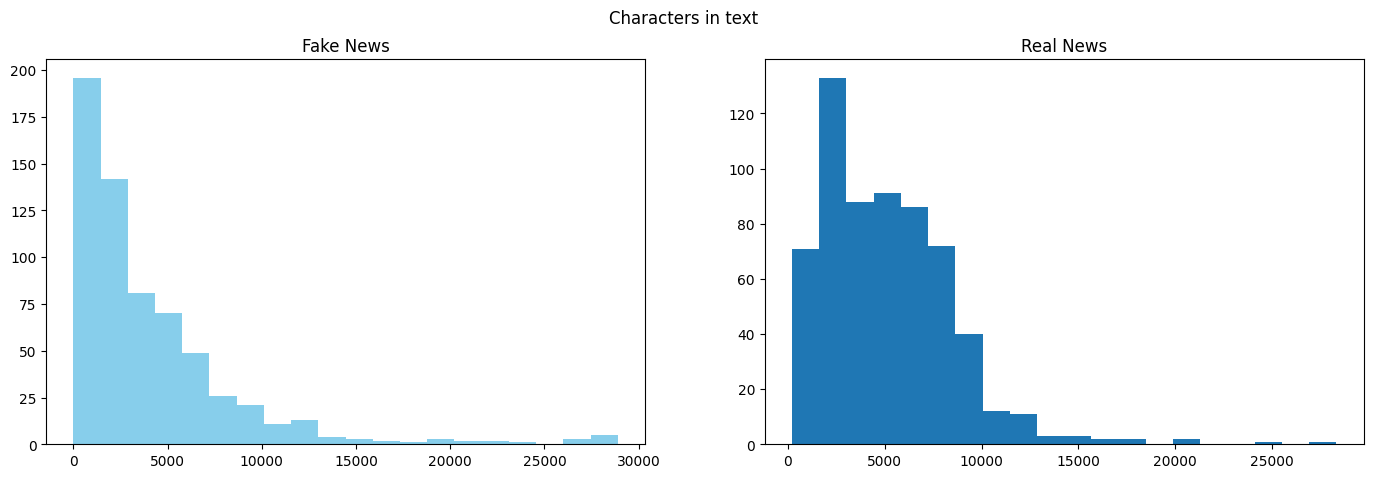

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df1[df1["label"]==1]['text'].str.len()
ax1.hist(length,bins = 20,color='skyblue')
ax1.set_title('Fake News')
length=df1[df1["label"]==0]['text'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real News')
fig.suptitle('Characters in text')
plt.show()

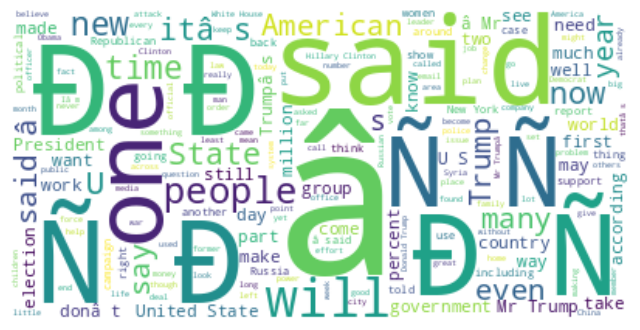

In [ ]:
text = " ".join([str(x) for x in df1.text])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

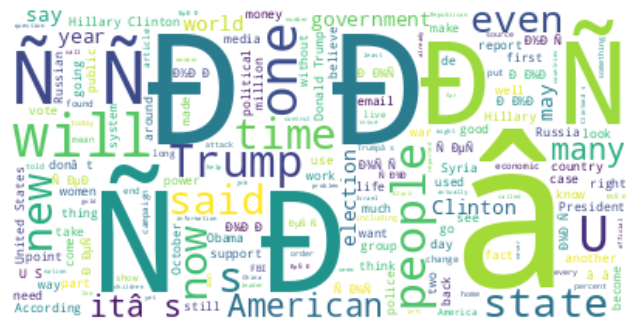

In [ ]:
## for fake
text = " ".join([str(x) for x in df1.text[df1.label==1]])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

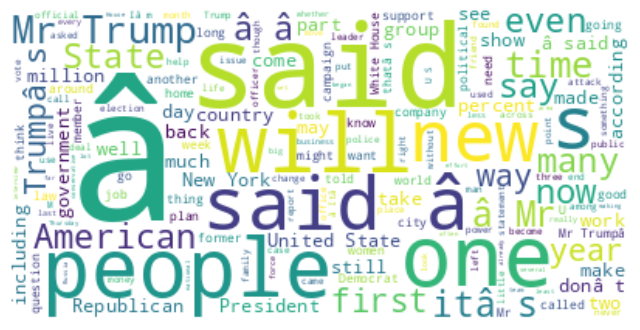

In [ ]:
## for real
text = " ".join([x for x in df1.text[df1.label==0]])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print('Number of 1 (Fake) : ', df1["label"].value_counts()[1])
print('Number of 0 (Not Fake) : ', df1["label"].value_counts()[0])

Number of 1 (Fake) :  635
Number of 0 (Not Fake) :  618


Text(0.5, 1.0, 'Target Count')

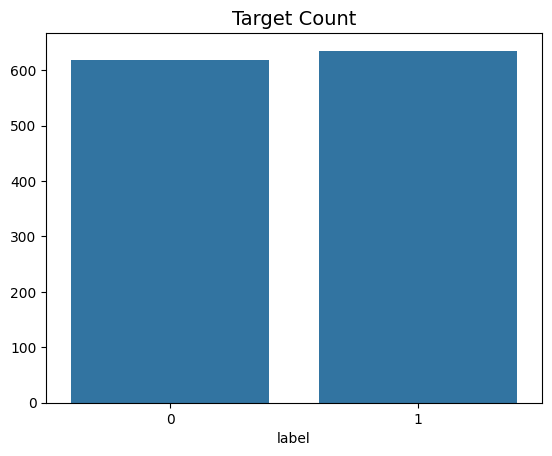

In [ ]:
label = df1["label"].value_counts()
sns.barplot(x=label.index, y=label.values)
plt.title('Target Count', fontsize=14)

In [ ]:
df1.drop(["id",	"title",	"author"], axis=1,inplace=True)

In [ ]:
df1.tail()

,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
1494,Former Central Intelligence Agency (CIA) and N...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,We all remember the lies that led the US into ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,A âgatewayâ between Western and Eastern Eu...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,17 mins ago 1 Views 0 Comments 0 Likes Drone f...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,\nLook at what is happening now across the Eur...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Indian Dataset

In [ ]:
fake_news_filepath = "/content/fake_news.csv"
real_news_filepath = "/content/True_news.csv"
fake_df = pd.read_csv(fake_news_filepath, encoding='ISO-8859-1')
real_df = pd.read_csv(real_news_filepath, encoding='ISO-8859-1')

In [ ]:
fake_df.head()

,Snippet,Category,Date
0,Education Minister Announces Shocking Discover...,Education,2021.0
1,Exclusive: Modis High-Income Vision Criticize...,Education,2024.0
2,High-Income India Dream Faces Backlash as Repo...,Education,2024.0
3,High-Income India Dream in Jeopardy: Modi Face...,Education,2024.0
4,Modis Vision for High-Income India Derails as...,Education,2024.0


In [ ]:
real_df.head()

,headline,Category,Snippet
0,"Cricket News: Cricket Live Score, Results, Upc...",Sport,"Aug 9, 2024 ... Latest Cricket News: Check liv..."
1,White House sends a special message to the US ...,Sport,"Jun 19, 2024 ... White House sends a special m..."
2,Cognizant becomes title sponsor of Major Leagu...,Sport,"Mar 14, 2024 ... Cricket News: Major League Cr..."
3,ICC Cricket Match Schedule 2024: India Upcomin...,Sport,Check all the upcoming cricket schedules for a...
4,Top 10 largest cricket stadiums in the world 2...,Sport,"Jul 18, 2024 ... World News: Explore the top 1..."


In [ ]:
# Classification Labels
real_df["label"] = 1
fake_df["label"] = 0


In [ ]:
df2 = pd.concat([fake_df, real_df])
df2.reset_index()
df2.head()

,Snippet,Category,Date,label,headline
0,Education Minister Announces Shocking Discover...,Education,2021.0,0,NaN
1,Exclusive: Modis High-Income Vision Criticize...,Education,2024.0,0,NaN
2,High-Income India Dream Faces Backlash as Repo...,Education,2024.0,0,NaN
3,High-Income India Dream in Jeopardy: Modi Face...,Education,2024.0,0,NaN
4,Modis Vision for High-Income India Derails as...,Education,2024.0,0,NaN


In [ ]:
print(f"Dataset Size: {len(df2)}")

Dataset Size: 1413


In [ ]:
# Data set management
df2 = df2.drop(columns=["headline", "Date"])

df2.sample(10)

,Snippet,Category,label
375,Driving Licence Renewal. Transport Department ...,crime,1
969,"Mar 24, 2024 ... Holi has roots in ancient Ind...",Entertainment,1
409,GOVERNMENT OF TELANGANA DISASTER RESPONSE AND ...,crime,1
221,"Jul 15, 2024 ... 'When students feel today's e...",Education,1
327,"Feb 22, 2024 Lifestyle News Live · India News...",Politics,0
336,"Feb 13, 2024 Attorney General R Venkataramani...",Politics,0
206,"Apr 7, 2023 Counting people remains a difficu...",Politics,0
823,1 day ago ... Kangana Ranaut has raised concer...,Sport,1
352,"Jun 3, 2017 ... ... Web Stories · Sports · Del...",Politics,0
847,"May 6, 2024 ... India News: West Bengal govern...",Sport,1


In [ ]:
# Get basic information about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Snippet   1413 non-null   object
 1   Category  1413 non-null   object
 2   label     1413 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ KB


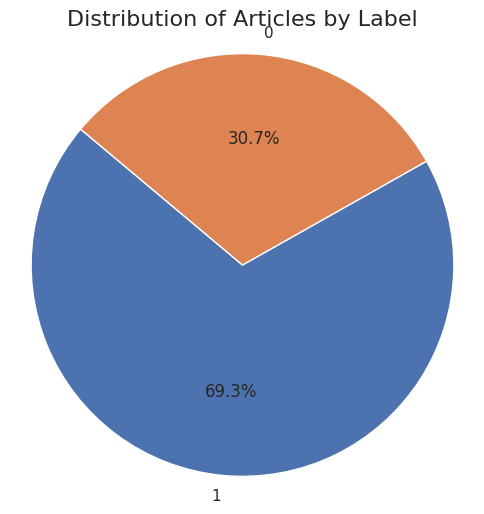

In [ ]:
# Pie chart for label distribution
plt.figure(figsize=(6,6))
# Count occurrences of each label
label_counts = df2['label'].value_counts()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep', len(label_counts)))
plt.title('Distribution of Articles by Label', fontsize=16)
plt.axis('equal')
plt.show()

<ipython-input-31-e0d16cccab1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


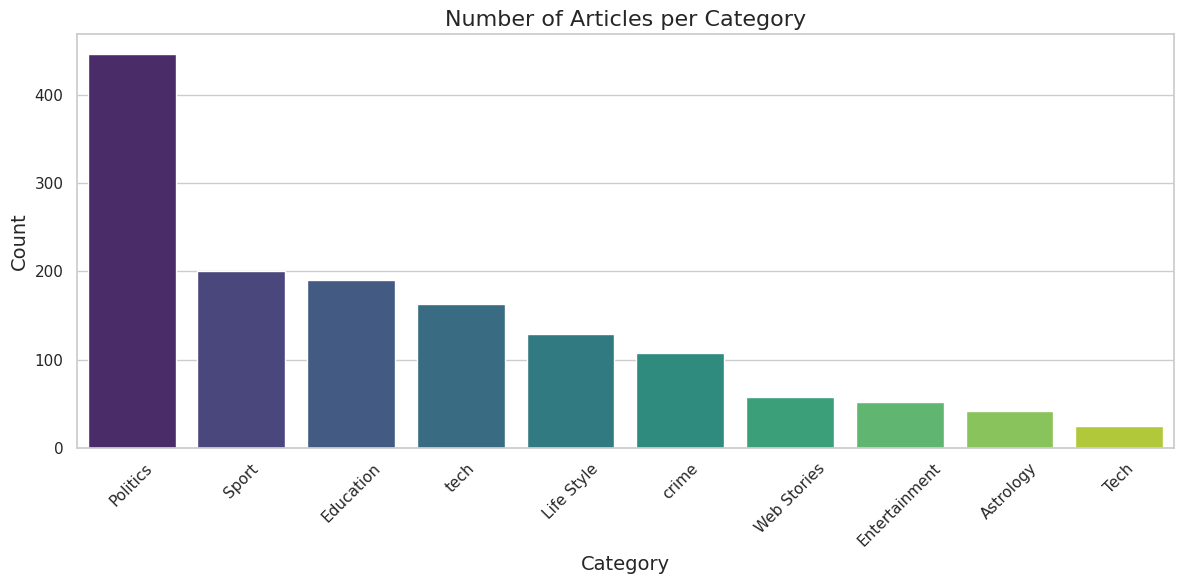

In [ ]:
# Count of articles per category
plt.figure(figsize=(12,6))
category_counts = df2['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of Articles per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

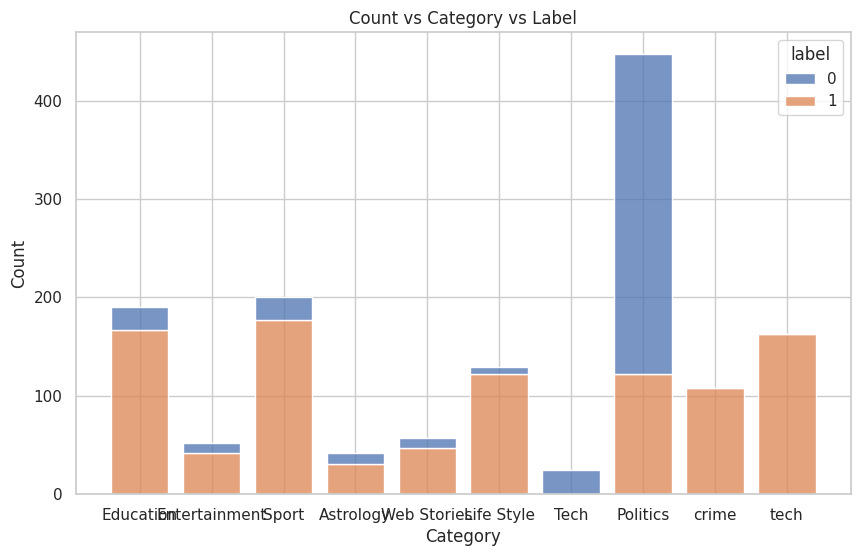

In [ ]:
# Histogram Plot: Count vs Category vs Label
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Category', hue='label', multiple='stack', bins=len(df2['Category'].unique()), shrink=0.8)
plt.title('Count vs Category vs Label')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
df2 = df2.drop(columns=["Category"])

In [ ]:
df2.to_csv('final_news.csv', index=False)

In [ ]:
df = pd.read_csv("/content/final_news(India,foreign).csv", encoding='ISO-8859-1', on_bad_lines='skip', engine='python')

In [ ]:
df = df.dropna(subset=['text', 'label'])
df = df[df['label'].isin(['1', '0',1 , 0])]  # Keep only rows with valid '1' or '0'
df['label'] = df['label'].astype(int)  # Convert to integers
df['text'] = df['text'].astype(str)

In [ ]:
df.tail()

,text,label
2923,Former Central Intelligence Agency (CIA) and N...,0
2924,We all remember the lies that led the US into ...,1
2925,A âgatewayâ between Western and Eastern Eu...,1
2926,17 mins ago 1 Views 0 Comments 0 Likes Drone f...,1
2927,\nLook at what is happening now across the Eur...,1


In [ ]:
# Dataset Preprocessing
def text_cleaning(text):
    text = str(text)
    text = re.sub("[^a-zA-Z]", " ", text) # removing punctuation
    return text
df['text'] = df['text'].apply(text_cleaning)

In [ ]:
train_df,eval_df = train_test_split(df,test_size = 0.5)

In [ ]:
!pip install simpletransformers

In [ ]:
!pip install simpletransformers==0.32.3

  Using cached simpletransformers-0.32.3-py3-none-any.whl.metadata (140 kB)
Using cached simpletransformers-0.32.3-py3-none-any.whl (187 kB)
  Attempting uninstall: simpletransformers
    Found existing installation: simpletransformers 0.70.1
    Uninstalling simpletransformers-0.70.1:
      Successfully uninstalled simpletransformers-0.70.1


In [ ]:
!pip install simpletransformers==0.61.13

  Using cached simpletransformers-0.61.13-py3-none-any.whl.metadata (36 kB)
Using cached simpletransformers-0.61.13-py3-none-any.whl (221 kB)
  Attempting uninstall: simpletransformers
    Found existing installation: simpletransformers 0.32.3
    Uninstalling simpletransformers-0.32.3:
      Successfully uninstalled simpletransformers-0.32.3


In [ ]:
!pip install --upgrade transformers
!pip install --upgrade simpletransformers

  Using cached simpletransformers-0.70.1-py3-none-any.whl.metadata (42 kB)
Using cached simpletransformers-0.70.1-py3-none-any.whl (316 kB)
  Attempting uninstall: simpletransformers
    Found existing installation: simpletransformers 0.61.13
    Uninstalling simpletransformers-0.61.13:
      Successfully uninstalled simpletransformers-0.61.13


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting epoch 1


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/167 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/14 [00:00<?, ?it/s]

Evaluation Loss: 0.4358440935611725
Precision: 0.8221041172725477
Recall: 0.8214553638409603
Accuracy: 0.8214553638409603


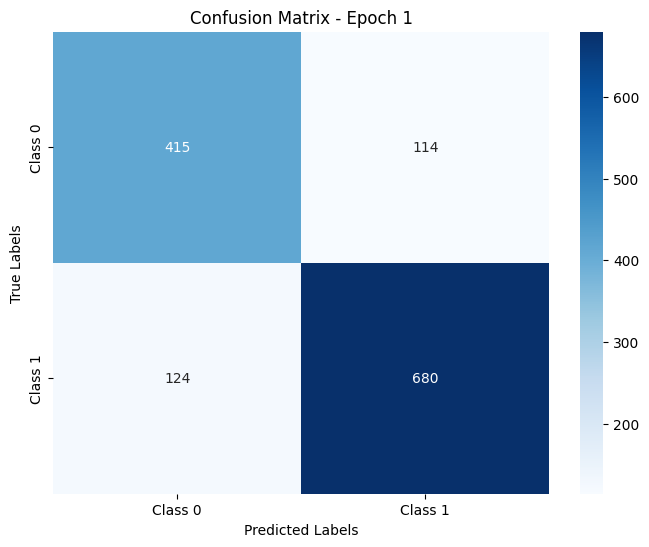

Starting epoch 2


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/167 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/14 [00:00<?, ?it/s]

Evaluation Loss: 0.3582695190395628
Precision: 0.8838451355490388
Recall: 0.8829707426856714
Accuracy: 0.8829707426856714


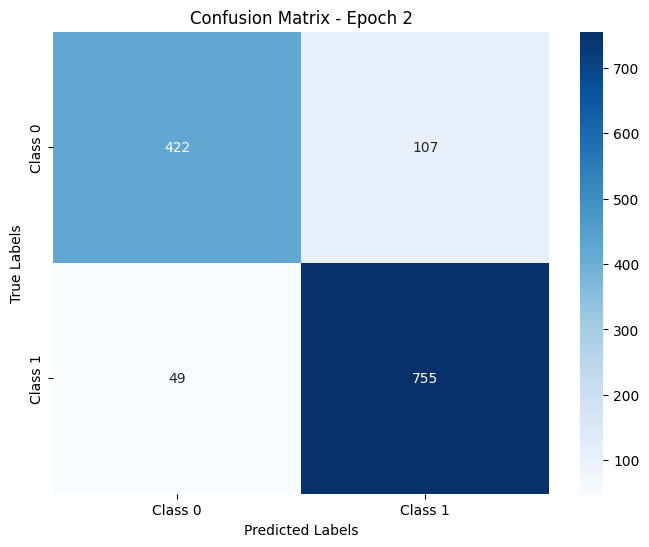

History Dictionary:
{'eval_loss': [0.4358440935611725, 0.3582695190395628], 'precision': [0.8221041172725477, 0.8838451355490388], 'recall': [0.8214553638409603, 0.8829707426856714], 'accuracy': [0.8214553638409603, 0.8829707426856714]}
History has been populated correctly.


In [ ]:
#included confusion matrix
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom output directory
output_dir = 'outputs/'

# If the directory exists, clear its contents
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Create a dictionary to store evaluation history
history = {
    'eval_loss': [],
    'precision': [],
    'recall': [],
    'accuracy': []
}

# Initialize the model
model = ClassificationModel(
    'bert',
    'bert-base-cased',
    use_cuda=False,
    args={'overwrite_output_dir': True, 'output_dir': output_dir}
)

# Train the model and pass both train_df and eval_df for evaluation during training
for epoch in range(2):  # Adjust the number of epochs as needed
    print(f"Starting epoch {epoch + 1}")

    # Train the model
    result_train, model_outputs = model.train_model(
        train_df,
        eval_df=eval_df,
        show_running_loss=True
    )

    # Evaluate the model
    result_eval, model_outputs, wrong_predictions = model.eval_model(eval_df)

    if isinstance(result_eval, dict):
        if 'eval_loss' in result_eval:
            print(f"Evaluation Loss: {result_eval['eval_loss']}")
            history['eval_loss'].append(result_eval['eval_loss'])

        # Get predictions and calculate precision, recall, and accuracy
        predictions = model_outputs.argmax(axis=1)
        labels = eval_df['label'].values
        precision = precision_score(labels, predictions, average='weighted', zero_division=0)
        recall = recall_score(labels, predictions, average='weighted', zero_division=0)
        accuracy = accuracy_score(labels, predictions)

        history['precision'].append(precision)
        history['recall'].append(recall)
        history['accuracy'].append(accuracy)

        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"Accuracy: {accuracy}")

        # Compute confusion matrix
        cm = confusion_matrix(labels, predictions)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
        plt.title(f"Confusion Matrix - Epoch {epoch + 1}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

    else:
        print(f"Unexpected result type for evaluation output: {type(result_eval)}")

# Check if history has been populated
print("History Dictionary:")
print(history)

if all(len(value) > 0 for value in history.values()):
    print("History has been populated correctly.")
else:
    print("Warning: Some history values are empty.")


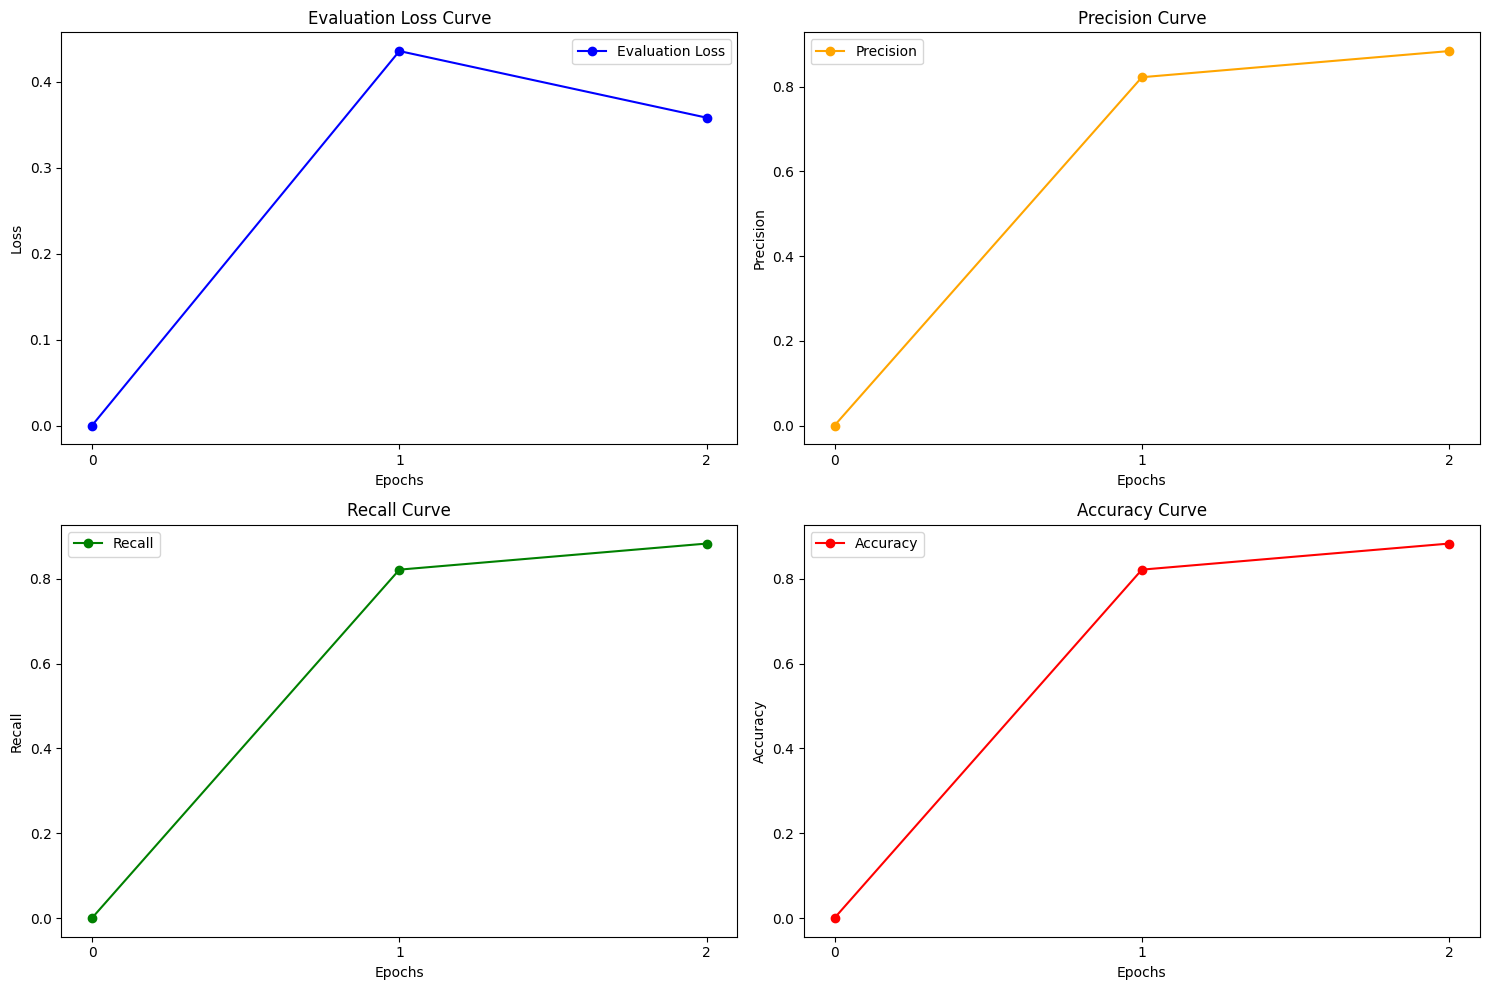

In [ ]:
import matplotlib.pyplot as plt

# Ensure history contains correct data for 2 epochs
history = {'eval_loss': [0.4358440935611725, 0.3582695190395628], 'precision': [0.8221041172725477, 0.8838451355490388], 'recall': [0.8214553638409603, 0.8829707426856714], 'accuracy': [0.8214553638409603, 0.8829707426856714]}

# Define the range of epochs explicitly
epochs = range(0, len(history['eval_loss']) + 1)  # Start from 0 to 2 (inclusive)

plt.figure(figsize=(15, 10))

# Plot Evaluation Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, [0] + history['eval_loss'], marker='o', label='Evaluation Loss', color='blue')  # Add a dummy 0 for epoch 0
plt.title('Evaluation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0, 1, 2])  # Explicitly set x-axis ticks to 0, 1, 2
plt.legend()

# Plot Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, [0] + history['precision'], marker='o', label='Precision', color='orange')  # Add a dummy 0 for epoch 0
plt.title('Precision Curve')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.xticks([0, 1, 2])
plt.legend()

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, [0] + history['recall'], marker='o', label='Recall', color='green')  # Add a dummy 0 for epoch 0
plt.title('Recall Curve')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.xticks([0, 1, 2])
plt.legend()

# Plot Accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, [0] + history['accuracy'], marker='o', label='Accuracy', color='red')  # Add a dummy 0 for epoch 0
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import shutil
import os
# Define the output directory
output_dir = '/content/outputs1'
# Save the model
model.save_model(output_dir)
print(f"Model saved in {output_dir}")
# Zip the directory for download
shutil.make_archive('/content/outputs1', 'zip', output_dir)
# Download the zipped model to your local machine
from google.colab import files
files.download('/content/outputs1.zip')

Model saved in /content/outputs1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile
# Path to your zip file
zip_path = '/content/outputs.zip'
extract_path = '/content/outputs/'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

In [ ]:
from simpletransformers.classification import ClassificationModel

# Load the model from the extracted directory
model = ClassificationModel('bert', extract_path, use_cuda=False)

In [ ]:
import re

# Text preprocessing function
def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    return text

# Input text
input_text = "A few days ago, under the headline, â€œThe Department of Homeland Security Takes on President Trump,â€ Virgil took note of a leak from the department, observing that the Deep State is â€œAlways doing something . . . to undermine the Trump administration. â€[Now, thanks to another leak from DHS, itâ€™s time for an update: On March 2, MSNBCâ€™s Rachel Maddow had a scoop â€”  paid for, of course, by American taxpayers.  Media Matters for America, the lefty outfit founded by David Brock, wrote up the segment under the headline, â€œRachel Maddow Exclusive Debunks â€˜Extreme Vettingâ€™ Propaganda Of Muslim Ban. â€ "
cleaned_text = preprocess_text(input_text)

# Create a list with the single preprocessed text
input_data = [cleaned_text]

# Make the prediction using the trained model
predictions, raw_outputs = model.predict(input_data)
print(predictions)

# Output the prediction
if predictions[0] == 1:
    print("The news article is classified as Real.")
else:
    print("The news article is classified as Fake.")
